In this notebook, we clusterize our 200k entries so that each future customer could compare with persons owning his group.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_stats_resampled_data.csv', index_col = 0)

In [3]:
X.shape

(369802, 15)

In [4]:
X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000


In [5]:
X_stats = X.iloc[0:295841, :]

In [6]:
X_stats.shape

(295841, 15)

In [7]:
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000


Wall time: 2h 54min 5s


Text(0, 0.5, 'Inertia')

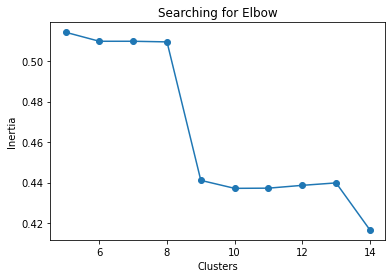

In [8]:
%%time
from sklearn import cluster, metrics

# Initialization, empty list
silhouettes = []

for num_clusters in range(5, 15):
    
    # Creating KMEANS for each number of clusters
    cls = cluster.KMeans(n_clusters=num_clusters)
    
    # Fitting model
    cls.fit(X_stats)
    
    # Silhouette_score for each model
    silh = metrics.silhouette_score(X_stats,cls.labels_)
    
    # Adding score in empty list for each model
    silhouettes.append(silh)
    
    

plt.plot(range(5, 15), silhouettes, marker = 'o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Here 13 clusters so 13 groups is too much. We want that each person could compare with a group relatively populated...
So we take 8 clusters

In [9]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

cls = cluster.KMeans(n_clusters = 9)

# Creating PCA
pca = PCA(n_components = 2)

# Fit
pca.fit(X_stats)

# We want to see the explained variance of our 2 features
print (pca.explained_variance_ratio_.cumsum())

# Transforming our X in 2 dimensions
X_trans_2= pca.transform(X_stats)

[0.594964   0.99551575]


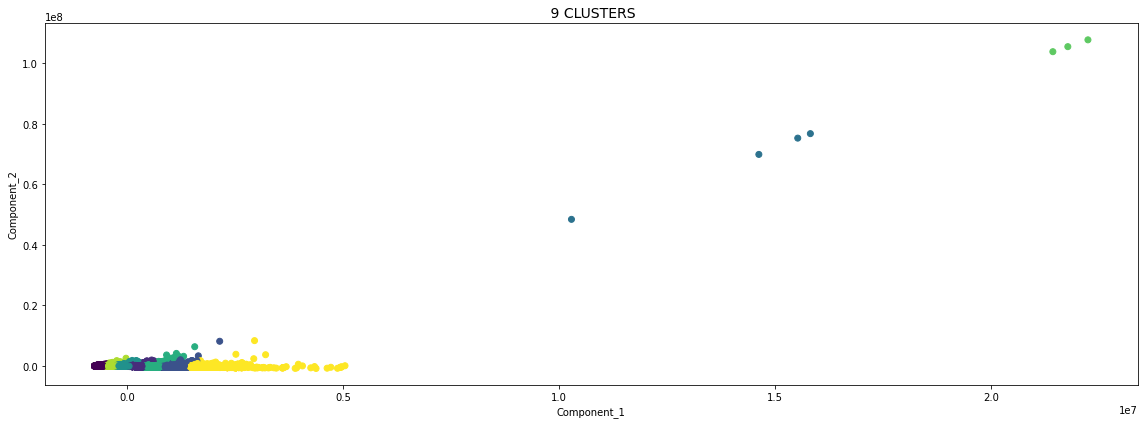

In [10]:
fig = plt.figure(figsize = [16,6])

# 3 clusters
cls = cluster.KMeans(n_clusters = 9)
cls.fit(X_trans_2)

# 
ax = fig.gca()  

# Spatial coordinates of each point in function of our 3 components
x = X_trans_2[:,0]
y = X_trans_2[:,1]


# Plotting scatters distinguishing our 2 clusters
ax.scatter(x, y, label='', marker = 'o',c = cls.labels_)

# Naming axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')


# Title
plt.title(" 9 CLUSTERS", fontsize = 14)

plt.tight_layout()
plt.show()


In [11]:
X_stats.shape

(295841, 15)

In [12]:
# fitting with our data
km = cluster.KMeans(n_clusters = 9).fit(X_stats)

In [13]:
km

KMeans(n_clusters=9)

In [14]:
import pickle

In [15]:
# Keeping clustering
pickle.dump (km, open ('clustering_9', 'wb'))

In [16]:
# Labels
km.labels_

array([4, 0, 7, ..., 6, 6, 0])

In [17]:
#check
km.labels_.shape

(295841,)

### Building stats tables

In this part we want that consumers could compare with other people... So once their informations given, they could have stats of the group they bring to.
But they don't want normalized datas, so we make some changes on X

In [18]:
X_stats.head(7)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000
5,67500.0,80865.0,5881.5,67500.0,2717,311.0,3227,2,0,0,0,0.715042,0.176653,37.5,1.198000
6,225000.0,918468.0,28966.5,697500.0,3028,643.0,4911,2,0,0,0,0.566907,0.770087,37.5,4.082080


In [19]:
X_stats.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/Xglobal.csv')

In [20]:
# Adding membership group on your DataFrame

MEMBERSHIP = km.labels_
X_stats['MEMBERSHIP'] = MEMBERSHIP
X_stats.head()

<ipython-input-20-1ede32760485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_stats['MEMBERSHIP'] = MEMBERSHIP


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000,4
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500,0
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053,7
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000,7
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000,8


In [21]:
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000,4
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500,0
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053,7
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000,7
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000,8


In [22]:
stat = X_stats.describe()

In [23]:
X0 = X_stats[X_stats['MEMBERSHIP']== 0]

In [24]:
X0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500,0
8,108000.0,509602.5,26149.5,387000.0,1317,6392.0,3866,2,1,1,0,0.236378,0.062103,37.5,4.718542,0
10,90000.0,544491.0,17563.5,454500.0,2038,1021.0,3964,2,0,0,0,0.586617,0.477649,32.5,6.049900,0
12,450000.0,497520.0,32521.5,450000.0,4306,114.0,2518,2,0,0,0,0.457143,0.358951,32.5,1.105600,0
17,292500.0,665892.0,24592.5,477000.0,2668,5266.0,3787,2,0,0,0,0.479987,0.410103,42.5,2.276554,0


In [25]:
# Dimensions
X0.shape

(77366, 16)

In [26]:
X0.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
X0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X0.csv')

In [28]:
# Stat0
stat0 = X0.describe()
stat0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,7.736600e+04,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000,77366.000000
mean,1.737062e+05,518016.398335,27736.138282,451999.461465,2132.053357,4382.060774,2797.232260,1.990047,0.061125,0.222501,0.159334,0.472228,0.439533,38.596929,3.559725
std,8.347652e+04,65291.253719,7980.034186,46003.852566,2056.323034,3027.306722,1399.672754,0.458930,0.239561,0.415928,0.365989,0.191443,0.194083,9.302456,1.599908
min,2.700000e+04,135000.000000,6750.000000,135000.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000013,0.000527,22.500000,0.188889
25%,1.158633e+05,450962.268024,22018.500000,450000.000000,778.000000,1832.191196,1655.000000,2.000000,0.000000,0.000000,0.000000,0.331583,0.288130,32.500000,2.457918
50%,1.575000e+05,521280.000000,26533.545108,450000.000000,1491.000000,4020.000000,2848.000000,2.000000,0.000000,0.000000,0.000000,0.509091,0.438275,37.500000,3.292000
75%,2.025000e+05,555369.247621,31261.500000,463500.000000,2764.000000,6377.241719,4044.000000,2.000000,0.000000,0.000000,0.000000,0.627979,0.593718,47.500000,4.344000
max,2.025000e+06,697302.000000,72306.000000,900000.000000,16429.000000,22442.000000,7197.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.893976,67.500000,20.541143


In [29]:
stat0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat0.csv')

In [30]:
#########################################################################################################################

In [31]:
X1 = X_stats[X_stats['MEMBERSHIP']== 1]

In [32]:
# Dimensions
X1.shape

(3, 16)

In [33]:
X1.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
X1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X1.csv')

In [35]:
# Stat1
stat1 = X1.describe()
stat1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.0,3.000000,3.000000,3.0,3.000000
mean,1.080546e+08,559214.285082,27480.024274,454113.152473,910.333333,6346.845408,3539.666667,2.0,0.0,0.0,0.0,0.149960,0.178194,32.5,0.034237
std,2.004363e+06,3963.660502,1073.646492,3070.448093,15.044379,106.944854,121.187183,0.0,0.0,0.0,0.0,0.008244,0.016239,0.0,0.007074
min,1.061573e+08,555808.201702,26338.609487,450585.915170,893.000000,6272.383570,3400.000000,2.0,0.0,0.0,0.0,0.141029,0.162681,32.5,0.026071
25%,1.070063e+08,557038.986350,26985.149693,453075.941045,905.500000,6285.572071,3501.000000,2.0,0.0,0.0,0.0,0.146300,0.169754,32.5,0.032120
50%,1.078553e+08,558269.770997,27631.689900,455565.966920,918.000000,6298.760573,3602.000000,2.0,0.0,0.0,0.0,0.151571,0.176828,32.5,0.038169
75%,1.090032e+08,560917.326772,28050.731668,455876.771124,919.000000,6384.076327,3609.500000,2.0,0.0,0.0,0.0,0.154425,0.185950,32.5,0.038320
max,1.101512e+08,563564.882547,28469.773436,456187.575328,920.000000,6469.392080,3617.000000,2.0,0.0,0.0,0.0,0.157280,0.195072,32.5,0.038470


In [36]:
stat1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat1.csv')

In [37]:
###############################################################################################################################

In [38]:
X2 = X_stats[X_stats['MEMBERSHIP']== 2]

In [39]:
X2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
34,180000.000000,1.663988e+06,86989.500000,1.588500e+06,2446,6755.000000,2177,2,0,0,0,0.570666,0.697147,57.5,9.244375,2
84,180000.000000,1.755000e+06,61132.500000,1.755000e+06,1549,3174.000000,4584,2,0,0,0,0.147685,0.669057,42.5,9.750000,2
145,315000.000000,1.575000e+06,41548.500000,1.575000e+06,3339,3522.000000,5525,2,1,1,0,0.690458,0.520898,37.5,5.000000,2
189,270000.000000,1.800000e+06,62698.500000,1.800000e+06,499,5508.000000,649,2,0,0,0,0.433919,0.786267,47.5,6.666667,2
205,247500.000000,1.971072e+06,68643.000000,1.800000e+06,365,3183.000000,4423,2,0,0,0,0.748204,0.739412,37.5,7.963927,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295223,182595.880635,1.762110e+06,48456.000000,1.575000e+06,2150,7020.287382,3403,2,0,0,0,0.576414,0.514868,42.5,9.651764,2
295328,249385.751658,1.786689e+06,72933.806563,1.786689e+06,732,4442.669159,4081,2,0,0,0,0.265323,0.606526,37.5,7.172291,2
295456,167120.655303,1.800000e+06,62642.700199,1.800000e+06,3441,5749.767855,3668,2,0,0,0,0.520772,0.350734,47.5,10.817736,2
295512,383877.026240,2.000753e+06,59932.853528,1.800000e+06,1675,3949.911139,4452,1,0,0,0,0.591364,0.546475,37.5,5.212390,2


In [40]:
# Dimensions
X2.shape

(6232, 16)

In [41]:
X2.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
X2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X2.csv')

In [43]:
# Stat2
stat2 = X2.describe()
stat2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,6.232000e+03,6.232000e+03,6232.000000,6.232000e+03,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000
mean,3.054010e+05,1.900800e+06,59319.202724,1.771021e+06,2767.633665,4463.718011,2987.774069,1.790276,0.054236,0.190789,0.157413,0.583307,0.513755,42.610719,7.471341
std,2.115530e+05,2.763388e+05,17452.385148,2.479580e+05,2463.623769,3176.932088,1486.767393,0.555518,0.226501,0.392955,0.364219,0.156985,0.185261,9.067620,2.945208
min,5.400000e+04,1.431531e+06,39816.000000,1.350000e+06,20.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.004792,0.000527,22.500000,0.159059
25%,2.025000e+05,1.752039e+06,48586.500000,1.575000e+06,997.750000,1728.208902,1755.500000,1.000000,0.000000,0.000000,0.000000,0.506209,0.374609,37.500000,5.356076
50%,2.700000e+05,1.800000e+06,56151.882408,1.800000e+06,2093.000000,4016.396672,3180.000000,2.000000,0.000000,0.000000,0.000000,0.624679,0.537070,42.500000,7.056064
75%,3.600000e+05,2.013840e+06,65324.250000,1.800000e+06,3745.000000,6688.000000,4287.000000,2.000000,0.000000,0.000000,0.000000,0.700050,0.661024,47.500000,9.308710
max,9.000000e+06,4.050000e+06,258025.500000,4.050000e+06,16632.000000,16970.000000,6207.000000,3.000000,1.000000,1.000000,1.000000,0.818404,0.882530,67.500000,31.938667


In [44]:
stat2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat2.csv')

In [45]:
###############################################################################################################################

In [46]:
X3 = X_stats[X_stats['MEMBERSHIP']== 3]

In [47]:
# Dimensions
X3.shape

(32127, 16)

In [48]:
X3.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
X3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X3.csv')

In [50]:
# Stat3
stat3 = X3.describe()
stat3

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.212700e+04,3.212700e+04,32127.000000,3.212700e+04,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000
mean,2.116726e+05,1.010539e+06,38527.206025,8.962155e+05,2494.622062,4585.982290,2875.073427,1.947490,0.053911,0.211691,0.165468,0.517760,0.483303,41.001261,5.810520
std,1.268384e+05,9.452234e+04,10701.680968,6.077033e+04,2246.319804,3148.767633,1449.372930,0.496969,0.225846,0.408513,0.371608,0.180581,0.188652,9.042148,2.572009
min,2.700000e+04,6.750000e+05,21960.000000,6.750000e+05,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000016,0.000527,22.500000,0.117160
25%,1.350000e+05,9.056880e+05,31195.235849,9.000000e+05,929.000000,1930.247182,1657.000000,2.000000,0.000000,0.000000,0.000000,0.406592,0.342529,32.500000,4.000000
50%,1.800000e+05,1.008117e+06,35824.500000,9.000000e+05,1839.000000,4214.000000,2999.000000,2.000000,0.000000,0.000000,0.000000,0.561068,0.496044,42.500000,5.389705
75%,2.475000e+05,1.078200e+06,44583.660585,9.045000e+05,3307.000000,6762.000000,4147.000000,2.000000,0.000000,0.000000,0.000000,0.657629,0.633032,47.500000,7.096886
max,6.750000e+06,1.256400e+06,108396.000000,1.350000e+06,16495.000000,21865.000000,6214.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.500000,33.333333


In [51]:
stat3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat3.csv')

In [52]:
###############################################################################################################################

In [53]:
X4 = X_stats[X_stats['MEMBERSHIP']== 4]

In [54]:
# Dimensions
X4.shape

(36043, 16)

In [55]:
X4.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
X4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X4.csv')

In [57]:
# Stat4
stat4 = X4.describe()
stat4

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000
mean,126841.031127,157040.458240,11040.811832,142721.103515,1988.720833,4446.515078,2686.515135,2.064756,0.075660,0.24185,0.168798,0.459470,0.460651,36.773090,1.452738
std,56869.754367,43678.485904,3866.215404,40953.747523,2010.565538,2972.550955,1428.083472,0.409058,0.264456,0.42821,0.374579,0.189289,0.198088,9.880403,0.719604
min,26550.000000,45000.000000,1980.000000,40500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000001,0.000527,22.500000,0.116379
25%,90000.000000,134775.000000,9000.000000,112500.000000,712.000000,2025.629525,1453.000000,2.000000,0.000000,0.00000,0.000000,0.318282,0.306202,27.500000,0.940576
50%,112500.000000,168081.785397,10125.000000,144000.000000,1341.000000,4106.000000,2707.000000,2.000000,0.000000,0.00000,0.000000,0.490783,0.463526,37.500000,1.333333
75%,157500.000000,180000.000000,13256.542315,180000.000000,2541.500000,6391.000000,3990.500000,2.000000,0.000000,0.00000,0.000000,0.613666,0.621226,42.500000,1.811200
max,810000.000000,315000.000000,26757.000000,270000.000000,17139.000000,19488.000000,6226.000000,3.000000,1.000000,1.00000,1.000000,0.855000,0.882530,67.500000,8.848000


In [58]:
stat4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat4.csv')

In [59]:
###########################################################################################################################

In [60]:
X5 = X_stats[X_stats['MEMBERSHIP']== 5]

In [61]:
# Dimensions
X5.shape

(4, 16)

In [62]:
X5.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
X5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X5.csv')

In [64]:
# Stat5
stat5 = X5.describe()
stat5

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.0,4.0,4.0,4.000000,4.000000,4.00,4.000000
mean,6.919909e+07,645509.240735,34228.066854,562973.830059,906.250000,4476.086197,2405.000000,1.75,0.0,0.0,0.0,0.341523,0.228023,36.25,0.185357
std,1.334303e+07,98579.819702,8853.488126,131880.832301,91.751022,1445.687490,670.385461,0.50,0.0,0.0,0.0,0.065761,0.030794,2.50,0.069121
min,4.969309e+07,559482.181470,26800.813841,438032.216654,803.000000,2812.228783,1577.000000,1.00,0.0,0.0,0.0,0.274762,0.195969,32.50,0.124958
25%,6.609753e+07,565127.416059,26886.262720,460906.124153,842.750000,3774.890691,2080.250000,1.75,0.0,0.0,0.0,0.315098,0.212227,36.25,0.140117
50%,7.428901e+07,631358.068854,32762.321819,549435.580134,913.500000,4398.904002,2434.500000,2.00,0.0,0.0,0.0,0.329550,0.223384,37.50,0.168017
75%,7.739057e+07,711739.893530,40104.125954,651503.286039,977.000000,5100.099508,2759.250000,2.00,0.0,0.0,0.0,0.355976,0.239180,37.50,0.213256
max,7.852527e+07,759838.643761,44586.809937,714991.943313,995.000000,6294.308000,3174.000000,2.00,0.0,0.0,0.0,0.432230,0.269357,37.50,0.280434


In [65]:
stat5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat5.csv')

In [66]:
#########################################################################################################################

In [67]:
X6 = X_stats[X_stats['MEMBERSHIP']== 6]

In [68]:
# Dimensions
X6.shape

(71404, 16)

In [69]:
X6.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
X6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X6.csv')

In [71]:
# Stat6
stat6 = X6.describe()
stat6

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,7.140400e+04,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000,71404.000000
mean,1.478300e+05,294950.372386,18588.506631,259790.726394,2103.349812,4433.959558,2753.968629,2.026315,0.065276,0.224231,0.161840,0.465557,0.450956,37.883942,2.366977
std,6.965852e+04,50653.299183,5645.038675,42872.767820,2084.052417,2999.295138,1399.184623,0.442348,0.247015,0.417078,0.368306,0.192123,0.198527,9.738323,1.083417
min,2.700000e+04,135000.000000,5935.500000,112500.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000005,0.000527,22.500000,0.066667
25%,1.080000e+05,254700.000000,13963.500000,225000.000000,749.000000,1971.000000,1596.000000,2.000000,0.000000,0.000000,0.000000,0.320756,0.294371,32.500000,1.621622
50%,1.350000e+05,284400.000000,17504.552943,247500.000000,1450.000000,4091.806799,2781.000000,2.000000,0.000000,0.000000,0.000000,0.499368,0.452481,37.500000,2.182857
75%,1.800000e+05,331920.000000,22050.000000,280074.650622,2716.000000,6380.514084,4017.000000,2.000000,0.000000,0.000000,0.000000,0.622621,0.611744,42.500000,2.894737
max,2.700000e+06,453816.000000,47367.000000,540000.000000,17912.000000,22701.000000,6259.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.887664,67.500000,12.903226


In [72]:
stat6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat6.csv')

In [73]:
###############################################################################################################################

In [74]:
X7 = X_stats[X_stats['MEMBERSHIP']== 7]

In [75]:
# Dimensions
X7.shape

(23327, 16)

In [76]:
X7.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
X7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X7.csv')

In [78]:
# Stat7
stat7 = X7.describe()
stat7

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,2.332700e+04,2.332700e+04,23327.000000,2.332700e+04,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000,23327.000000
mean,2.306721e+05,1.312727e+06,44181.281306,1.205426e+06,2739.069405,4728.946543,2939.630986,1.920736,0.053029,0.203584,0.166802,0.546053,0.511062,42.538796,6.867528
std,1.382905e+05,1.373239e+05,11191.182953,1.124953e+05,2415.417546,3200.301495,1457.747679,0.508457,0.224095,0.402672,0.372807,0.173960,0.182917,9.004605,2.909433
min,4.050000e+04,8.550000e+05,28552.500000,8.739092e+05,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000123,0.000527,22.500000,0.309400
25%,1.575000e+05,1.223010e+06,37666.547933,1.125000e+06,1011.000000,2050.500000,1770.000000,2.000000,0.000000,0.000000,0.000000,0.447847,0.380800,37.500000,4.886221
50%,2.025000e+05,1.288350e+06,41562.000000,1.129500e+06,2055.000000,4386.000000,3102.000000,2.000000,0.000000,0.000000,0.000000,0.592602,0.527782,42.500000,6.386000
75%,2.700000e+05,1.354500e+06,48612.193959,1.350000e+06,3707.000000,7030.500000,4215.000000,2.000000,0.000000,0.000000,0.000000,0.678421,0.657784,47.500000,8.366667
max,8.631431e+06,1.724220e+06,146250.000000,1.552500e+06,16424.000000,22928.000000,6166.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.882530,67.500000,32.222222


In [79]:
stat7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat7.csv')

In [80]:
##################################################################################################################

In [81]:
X8 = X_stats[X_stats['MEMBERSHIP']== 8]

In [82]:
# Dimensions
X8.shape

(49335, 16)

In [83]:
X8.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
X8.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X8.csv')

In [85]:
# Stat8
stat8 = X8.describe()
stat8

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,4.933500e+04,49335.000000,49335.000000,4.933500e+04,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000
mean,1.869706e+05,758430.281523,33321.797741,6.717965e+05,2441.120624,4645.465981,2852.350076,1.973305,0.055133,0.211148,0.163738,0.503437,0.474565,40.670873,4.887150
std,9.086152e+04,77620.701660,10426.201384,4.631034e+04,2251.943992,3141.419608,1438.482828,0.476637,0.228243,0.408127,0.370041,0.183118,0.190343,9.219489,2.221563
min,2.700000e+04,382500.000000,16024.500000,4.905000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000019,0.000527,22.500000,0.300000
25%,1.350000e+05,677526.989615,26136.000000,6.750000e+05,882.000000,1988.781533,1663.000000,2.000000,0.000000,0.000000,0.000000,0.380678,0.330861,32.500000,3.333333
50%,1.710000e+05,755190.000000,31333.500000,6.750000e+05,1778.000000,4295.572100,2968.000000,2.000000,0.000000,0.000000,0.000000,0.545019,0.484851,42.500000,4.475000
75%,2.250000e+05,808650.000000,37615.500000,6.795000e+05,3228.000000,6875.832607,4129.000000,2.000000,0.000000,0.000000,0.000000,0.647268,0.626304,47.500000,6.000000
max,2.250000e+06,969753.663448,89536.500000,1.012500e+06,16767.000000,20136.000000,6551.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.500000,25.671429


In [86]:
stat8.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat8.csv')

In [87]:
############################################################################################################################